# AMAT502:  Lecture 18

March 21, 2019.

Michael Lamoureux

In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from pywt import *
from math import tau
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import IFrame
from IPython.display import Audio, display

## Outline 


- 2D signals 
 - functions f(x,y) as signals. Eg Images, photos
 - sampling a signal in 2D
 - vector space of arrays $(\ldots, a_{j,k}$
 - plus, minus, times, divide
 - convolutions in 2D
 - multinomials $A(z_1,z_2) = \sum a_{j,k}z_1^j z_2^k$
 - evaluate on two complex circles $z_1 = e^{2\pi i \theta_1}, z_2 = e^{2\pi i \theta_2}$
 - Fourier transform $\hat{a}(\theta_1, \theta_2) = A(e^{2\pi i \theta_1},e^{2\pi i \theta_2})$
 - aliasing
 - Shannon Sampling Theorem
 - convolution and products via Fourier transform
 - energy, inner product
 - graph some examples (convolution and Fourier transforms)
 - Discrete Fourier transform
 - Fast Fourier transform
 - circular convolution
 - convolution as a matrix
 - Differential equations and the Fourier transform
- Application to images, photoshop
- General results for Fourier transforms 
 - on the real line
 - connection to Laplace transform
 - on other groups
- Filter design (deferred to next week)





## Important note

I'll probably do more details in class, so you might want to add to these basic notes.

## THIS STUFF IS TO BE UPDATED ON THURSDAY. 

**Functions as signals.** We start with a function $f(x,y)$ of two variables, which represents some data. It might be a photo from a camera, height of the ground as measured by a geologist, data collected from a telescope, and so on. 

**Sampling.** To store it in a computer, we can't evaluate at every point $x,y$. So we **sample** the signal at points $(x_0,y_0), (x_0,y_1), (x_1,y_0), (x_1,y_1),\ldots.$ This gives values $a_{j,k} = f(x_j,y_k)$ evaluated at all the sample points. 

Typically, the spatial samples are evenly spaced and we write $(x_j,y_k) = (j\Delta x, k\Delta y)$. You don't need to have the deltas to be the same, but often they are. 

Numerically, we create the x and y sample vectors using the linspace() function. The resulting samples $a_{j,k} = f(x_j,y_k)$ are just stored as a 2D array. 

Here is a quick plot of the Gaussian function, first in high resolution, then plotted at discrete points separated by $\Delta x = 0.5$. The 2D array of samples is in the array Z, below. 

So, don't sweat the details. The point is we have an array, that looks like a rectangular matrix.

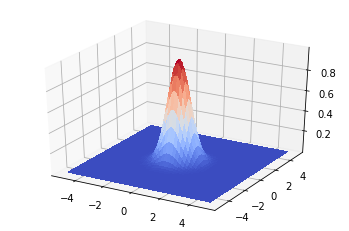

In [2]:
## Here is the function on a much finer grid
fig = figure()
ax = fig.gca(projection='3d')

x = linspace(-5,5,100);
y = linspace(-5,5,100)
X,Y = meshgrid(x,y)
Z = exp(-(X**2 + Y**2))
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);

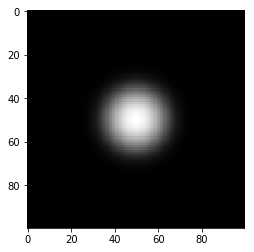

In [3]:
## Here is the same data, shown as a 2D image
imshow(log(Z+.1),cmap='gray');

## Sampling in 2D

The point is, we can sample the data. We often end up with a lower resolution version of the signal. In the following code, we sample down to a 10x10 grid. The resulting images still show the Gaussian hill, but at low resolution. 

In practice, we try to sample densely enough so you don't notice the data loss. 

(There is a Shannon sampling theorem for 2D as well.)

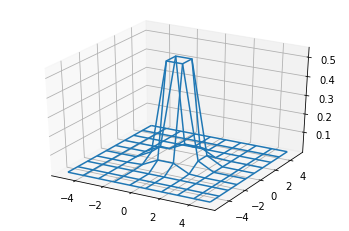

In [4]:
fig = figure()
ax = fig.gca(projection='3d')

x = linspace(-5,5,10);
y = linspace(-5,5,10)
X,Y = meshgrid(x,y)
Z = exp(-(X**2 + Y**2))
ax.plot_wireframe(X,Y,Z);

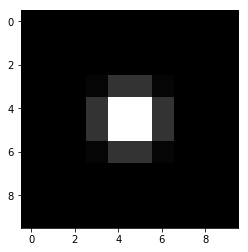

In [5]:
imshow(log(Z+.1),cmap='gray');

## Images

The point is, images are stored as arrays of numbers.

The resolution of the image is related to how many grid points are represented in the array. More grid points means higher resolution.

Python allows us to input these images and work with them as if they were arrays of numbers. 

Here is an example with a racoon.

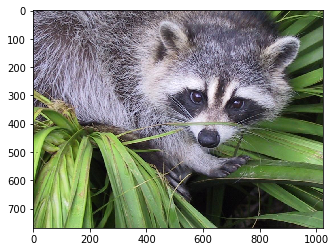

In [6]:
## Code for 2D signals

from scipy import misc
from scipy.signal import convolve2d
f = misc.face()
imshow(f);

In [7]:
## Look at the dimensions of the photo data
## It consistes of three arrays of size 768x1024
## The three arrays correspond to the 3 colors red, green, blue
shape(f)

(768, 1024, 3)

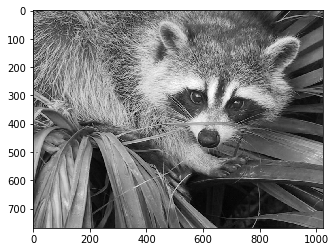

In [8]:
## We can select one component of the data and display in gray scale
## We use the Python "copy" command to get a new copy of the data
f1 = copy(f[:,:,0])
imshow(f1,cmap='gray');

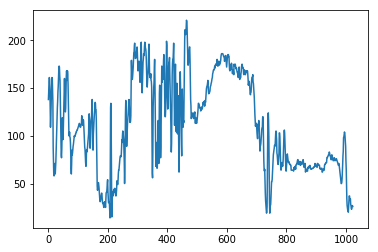

In [9]:
## The data is organizes as a bunch of rows. We can plot just one row, say at y=400.
## Can you see how the dark and light spots in the image corresponds to this row plot?
plot(f1[400,:]);

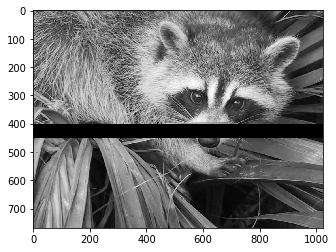

In [10]:
## plug in some zeros to get a black strip in the image
f1[400:450,:] = 0
imshow(f1,cmap='gray');

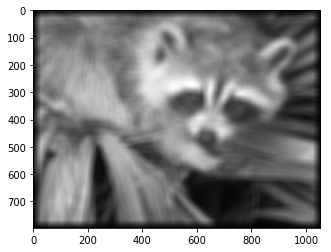

In [11]:
## Start with the image again, and convolve it with an array of ones.
## The result should be a blurry image
f1 = copy(f[:,:,0])
B = ones((30,30))/900
f2 = convolve2d(f1,B)
imshow(f2,cmap='gray');

In [12]:
## Let's check the details of a 2D convolution. 
## Notice the resulting array is bigger than the input arrays.
## The result sums the row lengths, and the column lengths, minus 1 (each)
## a is 2x3, b is 2x3, result is not 4x6, but insteal it is 3x5.
a = array([[1,2,3],[4,5,6]])
b = array([[2,2,2],[3,3,3]])
convolve2d(a,b)

array([[ 2,  6, 12, 10,  6],
       [11, 27, 48, 37, 21],
       [12, 27, 45, 33, 18]])

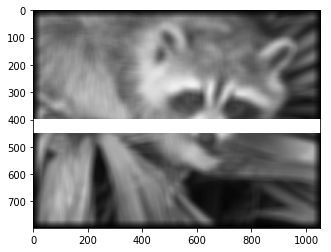

In [13]:
f2[400:450,:] = 250
imshow(f2,cmap='gray');

## Updating our 1D notes for 2D

All the previous notes about 1D signals can now be updated for arrays of numbers, which are 2D sampled signals. W

We will work on this in class.

**Vector space.** The set of 2D arrays
$$a = 
\left[
\begin{array}{cccc}
a_{0,0} & a_{0,1} & a_{0,2} & \ldots \\
a_{1,0} & a_{1,1} & a_{1,2} & \ldots \\
a_{2,0} & a_{2,1} & a_{2,2} & \ldots \\
a_{3,0} & a_{3,1} & a_{3,2} & \ldots \\
\ldots & \ldots & \ldots & \ldots 
\end{array}
\right]
$$
 is a vector space, under coordinate-wise addition, subtraction and multiplication by scalars. You can also multiply and divide coordinate-wise, which makes this a function space. 

**Convolution.** The convolution of two vectors $[a_{i,j}]$, $[b_{i,j}$ is given by the formula
$$c = a*b$$
where
$$c_{i,j} = \sum_{m,n} a_{i-m,j-n}b_{m,n}.$$
This is a double sum. 
This may look odd the first time you see it, but it is exactly how you multiply polynomials in two variables. Try multiplying 
$$A(z_1,z_2) = 1 + 2z_1 + 3z_2 +4z_1z_2, B(z_1,z_2) = 5 + 6z_1 + 7z_2 + 9z_1z_2$$
to see if this makes sense. If it doesn't make sense to you, play around with the formula until you understand how to compute it. This turns the vector space into an **algebra** under convolution. Note, however, the size  of the arrays get bigger as you convolve them together.

**Exercise.** 
- compute the convolution of these two arrays:
$$a = 
\left[
\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 
\end{array}
\right], 
b = 
\left[
\begin{array}{ccc}
1 & 2 & 3  \\
1 & 3 & 5
\end{array}
\right].
$$
- compute the convolution of these two arrays:
$$a = 
\left[
\begin{array}{ccc}
1 & 1 & 1  \\
1 & 1 & 1  \\
1 & 1 & 1  
\end{array}
\right], 
b = 
\left[
\begin{array}{ccc}
1 & 1 & 1  \\
1 & 1 & 1  \\
1 & 1 & 1
\end{array}
\right].
$$

- compute the convolution of these two arrays:
$$a = 
\left[
\begin{array}{ccc}
 0 & -1 & 0  \\
-1 &  4 & -1  \\
 0 & -1 & 0  
\end{array}
\right], 
b = 
\left[
\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 
\end{array}
\right].
$$

Here is some code to convolve two constant arrays. Notice the change in array size. Also notice the result has some linear structure. 

(Try this by hand: think about computing the convolution using the flip-and-shift method mentioned in class.)

In [14]:
a = ones((10,10))
b = ones((4,4))
c = convolve2d(a,b)
c

array([[ 1.,  2.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  2.,  1.],
       [ 2.,  4.,  6.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  6.,  4.,  2.],
       [ 3.,  6.,  9., 12., 12., 12., 12., 12., 12., 12.,  9.,  6.,  3.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 4.,  8., 12., 16., 16., 16., 16., 16., 16., 16., 12.,  8.,  4.],
       [ 3.,  6.,  9., 12., 12., 12., 12., 12., 12., 12.,  9.,  6.,  3.],
       [ 2.,  4.,  6.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  6.,  4.,  2.],
       [ 1.,  2.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  2.,  1.]])

In [15]:
## Look at the dimensions of the arrays
[shape(a),shape(b),shape(c)]

[(10, 10), (4, 4), (13, 13)]

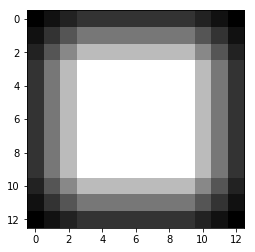

In [16]:
## View the result as an image
imshow(c,cmap='gray');

**Polynomials.** Given an array $a = (a_{ij})$, we can write down a polynomial in two variablea $z_1,z_2$ as
$$A(z_1,z_2) = \sum_{i,j}a_{ij} z_1^i z_2^j.$$
You can think of this as a polynomial in two variables on the complex plane.

For example, the array
$$ = 
\left[
\begin{array}{ccc}
1 & 2 & 3  \\
4 & 5 & 6
\end{array}
\right].
$$
will have polynomial
$$A(z_1,z_2) = 1 + 2z_2 + 3 z_2^2 + 4z_1 + 5z_1z_2 + 6 z_1z_2^2.$$ 

You should check with a few examples that convolution and polynomial multiplication agree. So, if we have and convolution $c = a*b$, then the corresponding polynomials just multiply together like polynomials
$$C(z_1,z_2) = A(z_1,z_2) B(z_1,z_2).$$

**On the complex unit circles.** The unit circle  in the complex plane is given by exponentials $e^{2\pi i \theta}.$ So we can evaluate the polynomial on these points, to get a function from the square $[0,1]\times[0,1[$ to complex numbers,
$$\theta_1, \theta_2 \mapsto A(e^{2\pi i \theta_1},e^{2\pi i \theta_2}).$$

**Fourier transform.** This map from the square to the complex numbers is called the Fourier transform of array 
$a = (a_{ij}).$ We usually write the Fourier transform with a hat, so
$$\hat{a}(\theta_1,\theta_2) = A(e^{2\pi i \theta_1},e^{2\pi i \theta_2}).$$
So, $a$ is an array and $\hat{a}$ is a function on the square $[0,1]\times[0,1]$.  And remember, it is not complicated -- just a polynomial evaluated on two unit circles in the complex plane.

**Examples.** Here are a few arrays and their Fourier transform. The FT is complex, so we should plot its real and imaginary parts. Or the absolute value. I think you can do this yourself by modifying the code.

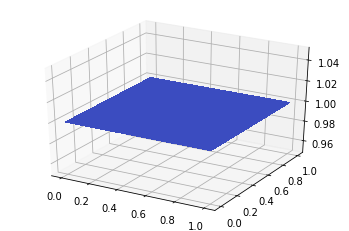

In [17]:
a = array([[1,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])  # a delta pulse. A single one

t1 = linspace(0,1,20);
t2 = linspace(0,1,20)
T1,T2 = meshgrid(t1,t2)
Z = exp(-(X**2 + Y**2))
ax.plot_wireframe(X,Y,Z);

def ahat(theta1,theta2):
    sum = 0
    max_i = shape(a)[0]
    max_j = shape(a)[1]
    for i in range(max_i):
        for j in range(max_j):
            sum = sum + a[i,j]*exp(1j*tau*theta1*i)*exp(1j*tau*theta2*j)
    return sum

fig = figure()
ax = fig.gca(projection='3d')

ax.plot_surface(T1, T2, real(ahat(T1,T2)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);    

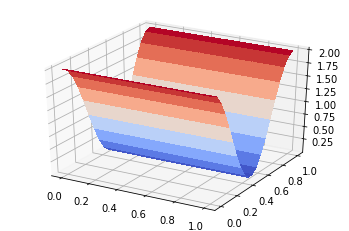

In [18]:
a = array([[1,1,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])  # two ones

t1 = linspace(0,1,20);
t2 = linspace(0,1,20)
T1,T2 = meshgrid(t1,t2)

def ahat(theta1,theta2):
    sum = 0
    max_i = shape(a)[0]
    max_j = shape(a)[1]
    for i in range(max_i):
        for j in range(max_j):
            sum = sum + a[i,j]*exp(1j*tau*theta1*i)*exp(1j*tau*theta2*j)
    return sum

fig = figure()
ax = fig.gca(projection='3d')

ax.plot_surface(T1, T2, real(ahat(T1,T2)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);    

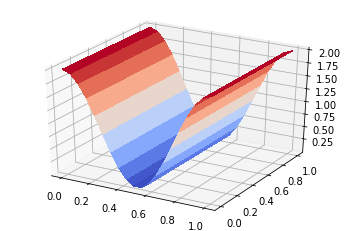

In [19]:
a = array([[1,0,0,0,0],[1,0,0,0,0],[0,0,0,0,0]])  # two ones, different places

t1 = linspace(0,1,20);
t2 = linspace(0,1,20)
T1,T2 = meshgrid(t1,t2)
Z = exp(-(X**2 + Y**2))
ax.plot_wireframe(X,Y,Z);

def ahat(theta1,theta2):
    sum = 0
    max_i = shape(a)[0]
    max_j = shape(a)[1]
    for i in range(max_i):
        for j in range(max_j):
            sum = sum + a[i,j]*exp(1j*tau*theta1*i)*exp(1j*tau*theta2*j)
    return sum

fig = figure()
ax = fig.gca(projection='3d')

ax.plot_surface(T1, T2, real(ahat(T1,T2)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);    

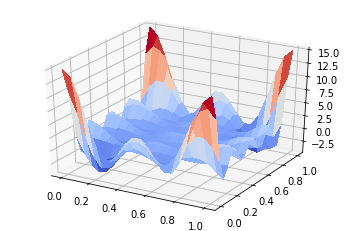

In [20]:
a = array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])  # a bunch of ones

t1 = linspace(0,1,20);
t2 = linspace(0,1,20)
T1,T2 = meshgrid(t1,t2)
Z = exp(-(X**2 + Y**2))
ax.plot_wireframe(X,Y,Z);

def ahat(theta1,theta2):
    sum = 0
    max_i = shape(a)[0]
    max_j = shape(a)[1]
    for i in range(max_i):
        for j in range(max_j):
            sum = sum + a[i,j]*exp(1j*tau*theta1*i)*exp(1j*tau*theta2*j)
    return sum

fig = figure()
ax = fig.gca(projection='3d')

ax.plot_surface(T1, T2, real(ahat(T1,T2)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);    

**Convolution and Fourier transform.** *Theorem:* a convolution becomes a product under the Fourier transform.

That is, if array $c = a*b$, then $\hat{c} = \hat{a}\cdot\hat{b}$, where the symbol $*$ means convolution, while $\cdot$ means multiplication of functions. Note these functions are functions of the two variables, $\theta_1$ and $\theta_2$ on the unit square $[0,1]\times[0,1]$.

The proof is just that the polynomials multiply, and the Fourier transform just evaluates the polynomials as functions on the unit circle in the complex plane. 



## Stuff on aliasing

**Aliasing.** This comes from the word **Alias** which means to disguise your name with a fake names. In signal processing, it is a fact that when you sample a signal, you lose information. So one signal may appear as another. 

For instance, if we sample a sine wave too slowly, we can't tell apart a slow sine wave from a fast sine wave.

The same is true in 2D. You can have a sine wave in two dimensions, like $f(x,y) = \sin(2\pi x)\sin(2\pi y)$ or more generally $f(x,y) = \sin(2\pi \omega_1 x)\sin(2\pi\omega_2 y)$.

Just as in 1D, if the frequencies $\omega_1$ and/or $\omega_2$ are too big, relative to the sampling rate, then there can be aliasing. The algebra is only a bit more complicated. 



## Shannon sampling theorem.

States that if a 2D signal $f(x,y)$ can be reconstructed exactly from its spatial samples $f(i\Delta x,j\Delta y)$, if $\Delta x$ is smaller than half the smallest wavelength in the x-direction, and  $\Delta y$ is smaller than half the smallest wavelength in the y-direction.

In terms of sampling "frequency" we can write $\Delta x = 1/F_x$ as the sampling interval in the x direction, and $\Delta y = 1/F_y$ as the sampling interval in the y direction. Then we need that  $F_x$ is at least twice as big as the highest frequency in $x$, and $F_y$ is at least twice as big as the highest frequency in $y.$

Roughly speaking, if the smallest feature size you wish to resolve is of width $w$, then you need $$\Delta x, \Delta_y < w/2.$$



## Inner product and energy

These formulas in 2D are exactly the obvious extension from 1D. 

For array $a = (a_{ij}), b = (b_{ij})$, the inner product, or dot product is given by
$$\langle a,b \rangle = \sum_{i,j}a_{ij}b_{ij}.$$
Sometimes we want to work with complex arrays, so we redefine the inner product to include a complex conjugation on the second array:
$$\langle a,b \rangle = \sum_{i,j}a_{ij}\overline{b_{ij}}. $$

The **Energy** of an array is its inner product with itself
$$Energy(a) = \langle a, a \rangle,$$
and the **norm** is the square root:
$$|| a || = \sqrt{\langle a, a \rangle}.$$

As we know from linear algebra, we have some geometric inequalities
$$| \langle a,b \rangle | \leq || a || \cdot ||b ||, $$
$$ || a + b || \leq ||a|| + ||b ||.$$

**On a function space:**
For functions $f,g$ on the unit square $[0,1]\times[0,1]$ we can also define an inner product by integrating the two:
$$\langle f,g \rangle = \int_0^1 \int_0^1 f(t_1,t_2) \overline{g(t_1,t_2)} \, dt_1 dt_2.$$
Notice the complex conjugate over the $g$ function. Then we also have energy and norm:
$$Energy(f) = \langle f,f  \rangle= \int_0^1 \int_0^1 |f(t_1,t_2)|^2  \, dt_1,dt_2,$$
and
$$ || f|| = \sqrt{\langle f,f  \rangle} = \sqrt{ \int_0^1\int_0^1 |f(t_1,t_2)|^2  \, dt_1,dt_2 }.$$

It's an exercise in calculus to get the geometric inequalities
$$| \langle f,g \rangle | \leq || f || \cdot ||g ||, $$
$$ || f + g || \leq ||f|| + ||g ||.$$

## Fourier transform preserves inner products, energy and norm.

This is a theorem. The idea is easy. If we have two arrays $a$ and $b$ with Fourier transforms $\hat{a}$ and $\hat{b}$ (which are functions on the square $[0,1]\times[0,1]$ then
$$\langle a,b \rangle = \langle \hat{a},\hat{b} \rangle, \quad Energy(a) = Energy(\hat{a}), \quad ||a|| = ||\hat{a}||.$$

The proof is just algebra. You should try it!

For instance, for the inner product of functions, the functions $\hat{a}\, \hat{b}$ are just polynomials in $e^{2\pi i \theta_1}, e^{2\pi i \theta_2}$. When you multiply them together (with a conjugate on $\hat{b}$), you end up with a sum involving terms a bunch of complex exponentials.

Most of them integrate to zero. The only ones that don't will integrate to one, leaving   factors 
$$a_{ij} \overline{b_{ij}} .$$
These get added up, and you the original inner product of arrays. 


The energy and norm results follow immediately from the inner product result. 


## Discrete Fourier transform

Just as in the 1D case, the 2D discrete Fourier transform means given an $N_1\times N_2$ array $a$, we sample the function $\hat{a}(\theta_1,\theta_2)$ at the points
$$\theta_1 =0, \frac{1}{N_1}, \frac{2}{N_1}, \ldots, \frac{N_1-1}{N_1},
\theta_2 =0, \frac{1}{N_2}, \frac{2}{N_2}, \ldots, \frac{N_2-1}{N_2}.$$

We can write this down as some massive sum involving complex exponentials. But let's get real: most of the time we will just call up some code to do it. So let's not worry too much about it. 



This DFT is a linear transform from $N_1\times N_2$-dimensional space, to $N_1\times N_2$-dimensional space. The inverse is given by a very similar formula -- there is a minus sign in the exponential, and a factor $1/(N_1 N_2)$.



## Warning:

There are several different conventions in defining the DFT. One choice is whether to put the minus sign in the inverse transform or the forward transform. Another choices is whether to normalize with the factor $1/(N_1 N_2)$, or to use a factor of $1/\sqrt{N_1 N_2}$ in both forward and inverse transforms.

When using software, you should check what the convention is. 

The energy and inner product results may need to be "corrected" with that factor of $N_1 N_2$ or $\sqrt{N_1 N_2}$. You can think about this. 

## The Fast Fourier Transform

The FFT was popularized by Cooley and Tukey in 1965, although Gauss had invented it back in 1805. 

It greatly speeds up the calculation of the Discrete Fourier transform. The DFT, using the sum above, take $O(N^2)$ floating point operations, while the FFT takes only $O(N\log_2(N))$.

For for instance, wtih N= 1,000,000, the DFT would take about 1,000,000,000,000 operations. (a trillion). The FFT takes only 18,000,000 which is a speedup by a factory by 50,000 times!

The idea behind the FFT is an interesting recursion. If we write $\omega = e^{2\pi i/N}$, the DFT matrix has entries of the form $w^{jk}$ which can be factored into a product of simpler matrices.

Or, another way to see it is to separate the DFT sum into even and odd parts,
$$\hat{a}_k =  \sum _{j=0}^{N-1} a_j \omega^{jk} = \sum_{j=2n} a_j \omega^{jk} + \sum_{j=2n+1} a_j \omega^{jk}.$$
These two sums on the right can be recognized as a DFT of a vector of length only N/2 each, using the complex elemetn $\omega^2$. Rinse and repeat long(N) times and you get the result..

Well, that's the basic idea. The main point is, this is really fast!

It also works in 2D. Yay!!



## Fourier transform in 2D

Let's quickly check that we can do FFTs in 2D. We will try a simple matrix (the identity) and see what happens to its FFT.

Then we try an actual image. Like our little raccoon.

In [21]:
from scipy import fftpack
from matplotlib.colors import LogNorm
    

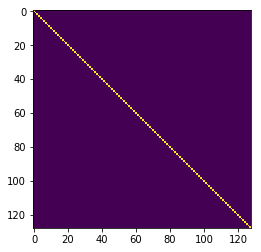

In [22]:
## An identity matrix with ones down the diagonal. 128 by 128.
imshow(eye(128));

/Users/mikel/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


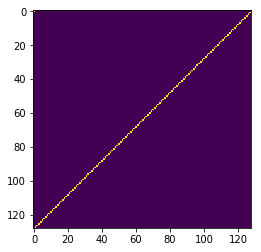

In [23]:
## 2D fft of the above image. Notice the line is in a different direction.
imshow(abs(fftpack.fft2(eye(128))));

/Users/mikel/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


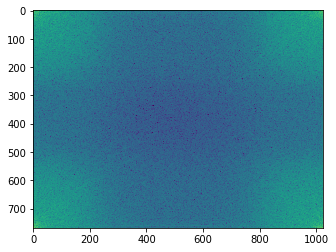

In [24]:
f = misc.face()
f1 = copy(f[:,:,0])
f2 = fftpack.fft2(f1)
imshow(abs(f2),norm=LogNorm(vmin=5));
 

/Users/mikel/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


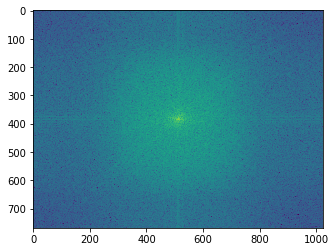

In [26]:
f = misc.face()
f1 = copy(f[:,:,0])
f2 = fftpack.fft2(f1)
f3 = fftpack.fftshift(f2)
imshow(abs(f3),norm=LogNorm(vmin=5));